In [6]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from glob import glob

Prior code from mva:

In [18]:
def read_xy(path: str):
    df = pd.read_csv(path, skipinitialspace=True)
    df['N'] = df.index + 1
    df['r'] = (df.x ** 2 + df.y ** 2) ** 0.5
    df['cr'] = df.r.cummax()
    df['fd'] = np.log(df.N) / np.log(df.cr)

    return df


def read_all(load_dir: str):
    paths = glob(f'{load_dir}/*.csv')
    return [read_xy(path) for path in paths]

In [34]:
def stick_prob_from_load_dir(load_dir: str):
    return float(Path(load_dir).name)


def read_sp_dir(load_dir: str):
    return stick_prob_from_load_dir(load_dir), read_all(load_dir)


def read_sp_full(probabilities_dir: str):
    a = [read_sp_dir(load_dir) for load_dir in glob(f'{probabilities_dir}/*')]
    b = [fd_of_dfs(dfs) for (p, dfs) in a]
    ps = [p for (p, dfs) in a]
    means, stds = list(zip(*b))
    c = pd.DataFrame(zip(ps, means, stds), columns=['p', 'fd_mean', 'fd_std'])
    c.sort_values(by='p', inplace=True)
    return c

In [29]:
rsp = read_sp_full('/Users/joshuacoles/Developer/checkouts/jc3091/CompB DLA/data-analysis/data/rust-sp')

/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshu

In [30]:
csp = read_sp_full("/Users/joshuacoles/Developer/checkouts/jc3091/CompB DLA/data-analysis/data/stick-probability")

/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshu

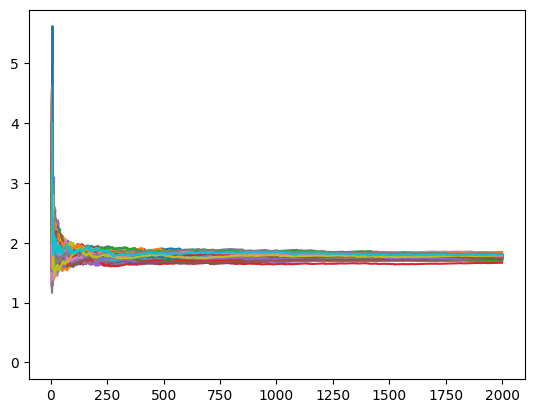

In [91]:
for df in dfs:
    plt.plot(df.N, df.fd)

plt.show()

In [45]:
def convergent_tail_index(series, tol):
    diffs = np.abs(np.ediff1d(series))
    for i in range(0, len(diffs)):
        if np.max(diffs[i:]) <= tol:
            return i

    # No convergence found
    return None


def mean_of_tail(series, tol=0.05):
    tail_index = convergent_tail_index(series, tol)
    return np.mean(series[tail_index:])

In [24]:
def fd_of_dfs(dfs):
    fds = [mean_of_tail(df.fd, 0.001) for df in dfs]
    fds_clean = [f for f in fds if f < np.inf]
    return np.mean(fds_clean), np.std(fds_clean)

In [97]:
a = [read_sp_dir(load_dir) for load_dir in
     glob('/Users/joshuacoles/Developer/checkouts/jc3091/CompB DLA/data-analysis/data/stick-probability/*')]

/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshu

In [98]:
b = [fd_of_dfs(dfs) for (p, dfs) in a]
ps = [p for (p, dfs) in a]
means, stds = list(zip(*b))

/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/numpy/lib/arraysetops.py:89: RuntimeWarning: invalid value encountered in subtract
  return ary[1:] - ary[:-1]


<ErrorbarContainer object of 3 artists>

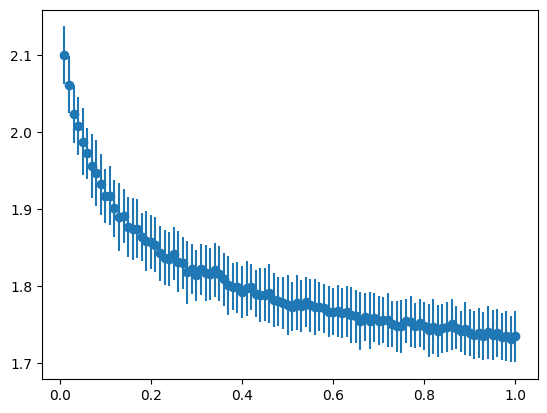

In [99]:
plt.errorbar(ps, means, stds, fmt="o")

In [101]:
b

[(1.7623004683109325, 0.03596422115385458),
 (1.7340653137947033, 0.030312176992614487),
 (1.7664949513839354, 0.03320159740588512),
 (1.7746352514734636, 0.03445962437314559),
 (1.7783856069945747, 0.036040062420532),
 (1.730997180197563, 0.030335538650960243),
 (1.7980617646084536, 0.03333254859415156),
 (1.9718474622007796, 0.03282677478354668),
 (2.0996468450828436, 0.03700393363178904),
 (1.9467681943832698, 0.042663108111833895),
 (1.8009467184721928, 0.03811616480021201),
 (1.773897002459139, 0.03327113934329051),
 (1.7348748396112013, 0.032109258676480346),
 (1.7789615003906782, 0.032898517912539844),
 (1.764542735129807, 0.03236699385097899),
 (1.738980769489769, 0.03167596622033688),
 (1.7363229768498947, 0.03081143932277302),
 (1.7603684110201956, 0.03483188535565984),
 (1.821426203779344, 0.033364198595247446),
 (1.9318375716926266, 0.03929360313022432),
 (1.8086490779523647, 0.03425773971128241),
 (1.7989185322185552, 0.030499537833079453),
 (1.9556449091742167, 0.04140180

In [107]:
c = pd.DataFrame(zip(ps, means, stds), columns=['p', 'fd_mean', 'fd_std'])

Observing the result from mva $1.7311567309540636$ we obtain an answer to 3sf which isn't bad, although it may be worth seeing if we can push the maxParticles higher to achieve better outcomes

In [36]:
rsp_1 = read_sp_full("/Users/joshuacoles/Developer/checkouts/jc3091/CompB DLA/data-analysis/data/rust-sp-0752370")

/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshu

In [43]:
rsp_f585358 = read_sp_full("/Users/joshuacoles/Developer/checkouts/jc3091/CompB DLA/data-analysis/data/rust-sp-f585358")
rsp_51ad848 = read_sp_full("../data/rust-sp-51ad848")

/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshu

In [46]:
rsp_da53077 = read_sp_full("../data/rust-sp-da53077")

/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshu

In [50]:
rsp_0a56c6f = read_sp_full("../data/rust-sp-da53077")

/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshu

In [96]:
rust_int_fd89d3f = read_sp_full("../data/rust-int-fd89d3f")
rust_int_dc64117 = read_sp_full("../data/rust-int-dc64117")
rust_sp_973bcf0 = read_sp_full("../data/rust-sp-973bcf0")

/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/numpy/lib/arraysetops.py:89: RuntimeWarning: invalid value encountered in subtract
  return ary[1:] - ary[:-1]
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/numpy/lib/arraysetops.py:89: RuntimeWarning: invalid value encountered in subtract
  return ary[1:] - ary[:-1]
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/numpy/lib/arraysetops.py:89: RuntimeWarning: invalid value encountered in subtract
  return ary[1:] - ary[:-1]


In [92]:
rust_sp_de88205 = read_sp_full("../data/rust-sp-de88205")

/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/numpy/lib/arraysetops.py:89: RuntimeWarning: invalid value encountered in subtract
  return ary[1:] - ary[:-1]


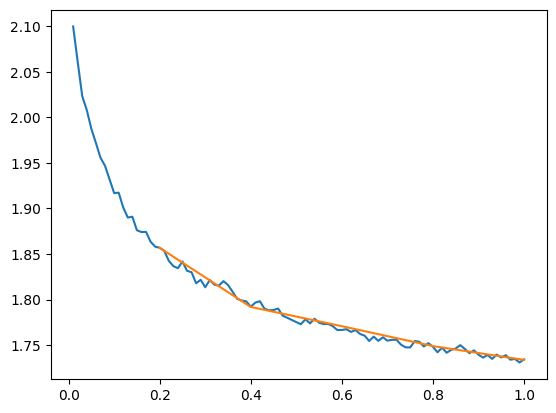

In [98]:
plt.plot(csp.p, csp.fd_mean)
# plt.plot(rsp.p, rsp.fd_mean)
# plt.plot(rsp_1.p, rsp_1.fd_mean)
# plt.plot(rsp_f585358.p, rsp_f585358.fd_mean)
# plt.plot(rsp_51ad848.p, rsp_51ad848.fd_mean)
# plt.plot(rsp_da53077.p, rsp_da53077.fd_mean)
# plt.plot(rsp_0a56c6f.p, rsp_0a56c6f.fd_mean)
# plt.plot(rust_int_fd89d3f.p, rust_int_fd89d3f.fd_mean)
# plt.plot(rust_int_dc64117.p, rust_int_dc64117.fd_mean)
# plt.plot(rust_sp_de88205.p, rust_sp_de88205.fd_mean)
plt.plot(rust_sp_973bcf0.p, rust_sp_973bcf0.fd_mean)

In [54]:
def model(x, a, b):
    return a * np.log(b * x)


param, _ = scipy.optimize.curve_fit(model, c.p, c.fd_mean)

NameError: name 'c' is not defined

/var/folders/yz/hjlw4lyn3rq0s5y_r82b55cw0000gn/T/ipykernel_46097/79153735.py:2: RuntimeWarning: divide by zero encountered in log
  return a * np.log(b * x)


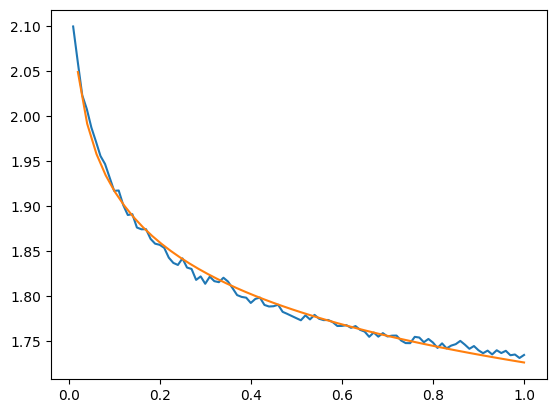

In [133]:
lx = np.linspace(0, 1)
ly = model(lx, *param)
plt.plot(c.p, c.fd_mean)
plt.plot(lx, ly)
plt.show()

In [91]:
np.seterr(divide='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

<ErrorbarContainer object of 3 artists>

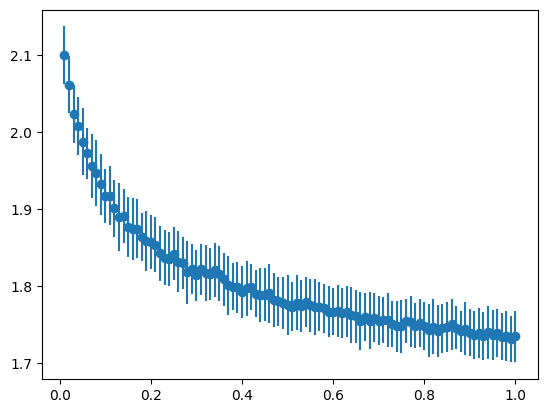

In [134]:
plt.errorbar(c.p, c.fd_mean, c.fd_std, fmt="o")

In [20]:
pR, dfsR = read_sp_dir("/Users/joshuacoles/Developer/checkouts/jc3091/CompB DLA/data-analysis/data/rust-sp/1")

/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshu

In [25]:
fd_of_dfs(dfsR)

/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/numpy/lib/arraysetops.py:89: RuntimeWarning: invalid value encountered in subtract
  return ary[1:] - ary[:-1]


(1.4793898735996318, 0.021266015927006374)

In [65]:
read_sp_dir("./data/rust-sp-ac6e176/0.3")

(0.3, [])

In [71]:
p, pdfs = read_sp_dir("/Users/joshuacoles/Developer/checkouts/jc3091/CompB DLA/data-analysis/data/rust-sp-ac6e176/0.2")

/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshu

In [74]:
p, fd_of_dfs(pdfs)

/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/numpy/lib/arraysetops.py:89: RuntimeWarning: invalid value encountered in subtract
  return ary[1:] - ary[:-1]


(0.2, (1.8355716895653595, 0.024029333380630867))

Hmmm even with a different RNG I still get a dip around 0.6, I think theres something hiding there